### Урок 3. Классификация. Логистическая регрессия.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]])
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [108]:
#стандартизация, используя матричные операции, срока из 1 не меняется
def calc_std_feat(X):
    X_1, X_2 = X[1:,], X[0,]
    std = X_1.T.std(0)
    mean = X_1.T.mean(0)    
    res = ((X_1.T-mean)/std).T
    res = np.vstack((X_2,res))
    return res

In [109]:
X_st=X.copy()

In [110]:
X_st = calc_std_feat(X_st)
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [118]:
X_st.T.mean(axis=0), X_st.T.std(axis=0)

(array([ 1.00000000e+00,  4.44089210e-17, -4.16333634e-17,  8.32667268e-17]),
 array([0., 1., 1., 1.]))

In [9]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [11]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

Logistic Regression

### Д/З 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [15]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        #для того, чтобы избежать 0 под знаком log, заменим 0 и 1 в массиве y_pred на малые/большие значения
        y_pred[y_pred==0] =1e-10
        y_pred[y_pred==1] =0.9999999999
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
    return W, err

In [16]:
W, err = eval_model(X_st, y, iterations=5000, alpha=1)

## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

### Д/3 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Для выбора параметров построим график зависимости ошибки от альфа и количества итераций**

In [106]:
from pylab import rcParams

rcParams["figure.figsize"] = 15, 9

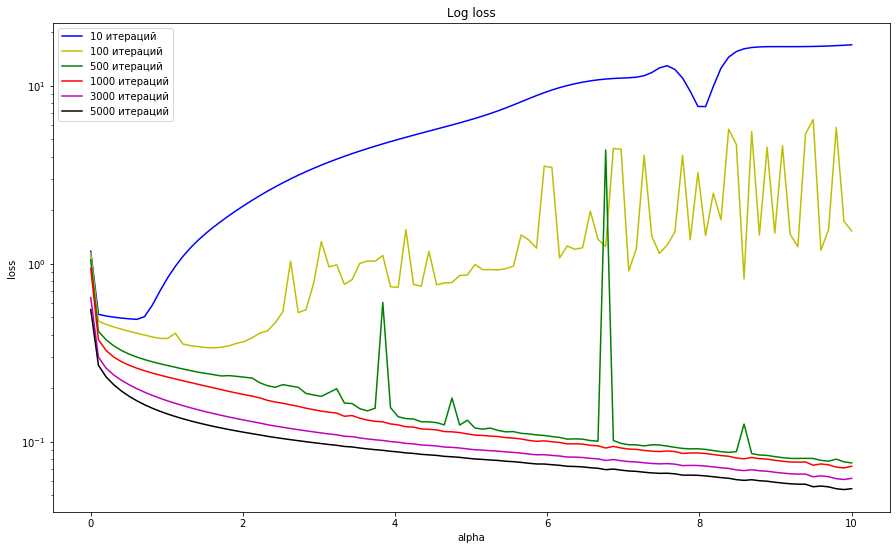

In [111]:
import matplotlib.pyplot as plt
alphas = np.linspace(1e-4, 10, 100)
iters = [{"iter":10, "color":"b"},
         {"iter":100, "color":"y"},
         {"iter":500, "color":"g"},
         {"iter":1000, "color":"r"},
         {"iter":3000, "color":"m"},
         {"iter":5000, "color":"k"}
        ]
for it in iters[:6]:       
    errs=[]
    for a in alphas:
        W, err = eval_model(X_st, y, iterations=it['iter'], alpha=a)
        errs.append(err)
    plt.plot (alphas, errs, color= it['color'], label = f'{it["iter"]} итераций')

plt.yscale('log')
plt.title('Log loss')
plt.xlabel('alpha')
plt.ylabel('loss')
plt.legend()
             
plt.show()

**Вывод: для минимизации log loss следует увеличивать число итераций и значение альфа. Можно взять количество итераций =5000 и альфа 10

### Д/З 3.Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

### Д/З 4 Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [28]:
def calc_pred_proba (X, W):
    return 1/(1+ np.exp(-1*np.dot(W, X))) 


In [29]:
W, err = eval_model(X_st, y, iterations=5000, alpha=10)
W

array([-81.68333645,  -6.99943053, -23.14756828,  64.85523668])

In [30]:
y_pred_proba = calc_pred_proba (X_st, W)
print (y_pred_proba)

[2.40048965e-01 2.25482693e-05 1.00000000e+00 1.84953433e-15
 9.87304440e-01 2.08761677e-04 1.00000000e+00 2.37009550e-03
 7.74595358e-01 1.00000000e+00]


In [32]:
def calc_pred (W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    y_pred[y_pred<=0.5] =0
    y_pred[y_pred>0.5] =1
    return y_pred
    

In [33]:
y_pred = calc_pred (W,X_st )
print ("Истинное значение: ", y)
print ("Предсказ значение: ", y_pred)

Истинное значение:  [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
Предсказ значение:  [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


### Д/З 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

матрица ошибок:

|  <empty>   | $$y = +1$$ | $$y = -1$$ |
--- | --- | ---
| __$$a_{1}(x) = +1$$__  |   5    |   0   |
| __$$a_{1}(x) = -1$$__ |    5    |   0   |
    

In [34]:
def calculate_quality(y, y_pred):
    TP=0
    FP=0
    FN=0
    TN=0
    n=0
    for i in range(len (y)):

        if y[i]== 1 and y_pred[i]==1:
            TP+=1
            n+=1
        elif y[i]== 1 and y_pred[i]==0:
            FP+=1
        elif y[i]== 0 and y_pred[i]==0:
            TN+=1
            n+=1
        elif y[i]== 0 and y_pred[i]==1:
            FN+=1
        
    accuracy = n/len(y)
    𝑝𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛 = TP/(TP+FP)
    recall =TP/(TP+FN)
    F= 2*precision*recall/(precision+recall)
    return accuracy, TP, FP, FN, TN, precision, recall, F

In [35]:
accuracy, TP, FP, FN, TN, precision, recall, F = calculate_quality(y, y_pred)

print ("TP=",TP)
print ("FP=", FP)
print ("FN=", FN)
print ("TN=", TN)
print ("accuracy=",accuracy)
print ("precision=", precision)
print ("recall=", recall)
print ("F=", F )

TP= 5
FP= 0
FN= 0
TN= 5
accuracy= 1.0
precision= 1.0
recall= 1.0
F= 1.0


### Д/З 6. Могла ли модель переобучиться? Почему?

Модель может преобучиться, поскольку в ее основе - линейная регрессия.
В данном случае модель определила верно все тестовые значения, признаком переобучеенности может быть также большие значения коэфициентов W и различный знак при них. 

### Д/З 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [39]:
#L2- регуляризация 
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_coef: float = 0.01):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        y_pred[y_pred==0] =1e-10
        y_pred[y_pred==1] =0.9999999999
        err = calc_logloss(y, y_pred)
        W = W*(1-alpha*lambda_coef)- alpha * (1/n * np.dot((y_pred - y), X.T))

    return W, err

In [40]:
W, err = eval_model_l2(X_st, y, iterations=5000, alpha=10)
W

array([ 0.29325491, -0.4349533 ,  5.55056739, 17.13535989])

In [53]:
#L1- регуляризация 
def eval_model_l1(X, y, iterations, alpha=1e-4,  lambda_coef: float = 0.01):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        
        y_pred[y_pred==0] =1e-10
        y_pred[y_pred==1] =0.9999999999
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) +lambda_coef*np.sign(W))
       
    return W, err

In [54]:
W, err = eval_model_l1(X_st, y, iterations=5000, alpha=10)
W

array([-47.75246104,  -8.40708582,  -9.24170458,  45.83349137])

In [93]:
arr = np.array([[1,2,1,3,1,1],
               [2,2,2,3,2,2],
               [3,3,2,3,3,3]])

In [55]:
x=[1,1,1]
b=[2,2,2]

In [57]:
((arr.T-x)/b).T

array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. , 1. ]])

In [79]:
calc_std_feat(arr)

array([[-0.65465367, -0.4472136 ,  0.4472136 ],
       [ 0.65465367, -0.4472136 ,  0.4472136 ],
       [-0.65465367, -0.4472136 , -2.23606798],
       [ 1.96396101,  2.23606798,  0.4472136 ],
       [-0.65465367, -0.4472136 ,  0.4472136 ],
       [-0.65465367, -0.4472136 ,  0.4472136 ]])

In [80]:
arr[1:,]

array([[2, 2, 2, 3, 2, 2],
       [3, 3, 2, 3, 3, 3]])

In [90]:
new=calc_std_feat(arr[1:,])

In [91]:
new

array([[-0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798, -0.4472136 ,
        -0.4472136 ],
       [ 0.4472136 ,  0.4472136 , -2.23606798,  0.4472136 ,  0.4472136 ,
         0.4472136 ]])

In [92]:
arr[0,]

array([1, 2, 1, 3, 1, 1])

In [95]:
A = np.vstack((arr[0,],new))

In [96]:
A

array([[ 1.        ,  2.        ,  1.        ,  3.        ,  1.        ,
         1.        ],
       [-0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798, -0.4472136 ,
        -0.4472136 ],
       [ 0.4472136 ,  0.4472136 , -2.23606798,  0.4472136 ,  0.4472136 ,
         0.4472136 ]])

In [99]:
new=calc_std_feat(arr)

In [100]:
new

array([[ 2.        ,  2.        ,  2.        ,  3.        ,  2.        ,
         2.        ],
       [-0.4472136 , -0.4472136 , -0.4472136 ,  2.23606798, -0.4472136 ,
        -0.4472136 ],
       [ 0.4472136 ,  0.4472136 , -2.23606798,  0.4472136 ,  0.4472136 ,
         0.4472136 ]])